**1.Detect and classify risk and urgency levels based on patient responses.**

In [ ]:
!pip install transformers datasets torch nltk


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 5.8 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


In [ ]:
import pandas as pd
from transformers import AutoTokenizer, AutoModelForSequenceClassification, Trainer, TrainingArguments
from datasets import Dataset
import torch


In [ ]:
import pandas as pd
data = pd.read_csv("gpt-4.csv", engine='python', on_bad_lines='skip')

print(data.head())


                                                data  \
0  This 60-year-old male was hospitalized due to ...   
1  A 39-year-old man was hospitalized due to an i...   
2  One week after a positive COVID-19 result this...   
3  This 69-year-old male was admitted to the ICU ...   
4  This 57-year-old male was admitted to the ICU ...   

                                        conversation  
0  Doctor: Good morning, how are you feeling toda...  
1  Doctor: Hello, how are you feeling today?\nPat...  
2  Doctor: Hello, how are you feeling today?\nPat...  
3  Doctor: Hello, how are you feeling today?\nPat...  
4  Doctor: Good morning, how are you feeling toda...  


In [ ]:
!pip install --upgrade nltk
import nltk
nltk.download('popular') # Download all popular packages from NLTK

import pandas as pd
from nltk.tokenize import word_tokenize
from transformers import pipeline

# Ensure necessary NLTK resources are downloaded (This may not be necessary after downloading 'popular')
nltk.download('punkt')
nltk.download('punkt_tab')

# Load the dataset
df = pd.read_csv("gpt-4.csv", engine='python', on_bad_lines='skip')
data = pd.DataFrame(df)

# Define keywords for risk and urgency levels
low_risk_keywords = ["mild", "better", "normal", "routine"]
medium_risk_keywords = ["fever", "cough", "body aches", "headache"]
high_risk_keywords = ["difficulty breathing", "chest pain", "emergency", "severe", "critical"]

non_urgent_keywords = ["check-up", "follow-up"]
urgent_keywords = ["severe", "noticeable symptoms", "trouble breathing"]
critical_keywords = ["life-threatening", "ICU", "critical", "can't move"]

# Initialize the sentiment analysis pipeline with a truncation-friendly model
sentiment_model = pipeline("sentiment-analysis")

# Helper function to truncate long texts to a specified token length
def truncate_text(text, max_length=512):
    tokens = word_tokenize(text)
    if len(tokens) > max_length:
        return " ".join(tokens[:max_length])
    return text

# Function to classify risk, urgency, and sentiment
def classify_risk_urgency(conversation):
    # Handle empty or missing conversations
    if pd.isna(conversation) or conversation.strip() == "":
        return "Unknown", "Unknown", "Neutral"

    # Truncate the conversation to avoid token length issues
    conversation = truncate_text(conversation, max_length=512)

    # Classify risk level based on keywords
    if any(word in conversation.lower() for word in high_risk_keywords):
        risk = "High Risk"
    elif any(word in conversation.lower() for word in medium_risk_keywords):
        risk = "Medium Risk"
    else:
        risk = "Low Risk"

    # Classify urgency level based on keywords
    if any(word in conversation.lower() for word in critical_keywords):
        urgency = "Critical"
    elif any(word in conversation.lower() for word in urgent_keywords):
        urgency = "Urgent"
    else:
        urgency = "Non-Urgent"



    return risk, urgency

# Apply the classification function to the dataset
data[["Risk", "Urgency"]] = data["conversation"].apply(
    lambda x: pd.Series(classify_risk_urgency(x))
)

# Save the labeled dataset to a new CSV file
data.to_csv("labeled_dataset.csv", index=False)

# Display the labeled dataset



[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/movie_reviews.zip.
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/names.zip.
[nltk_data]    | Downloading package shakespeare to /root/nltk_data...
[nlt

config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

Device set to use cpu


In [ ]:
print(data.head(10))

                                                data  \
0  This 60-year-old male was hospitalized due to ...   
1  A 39-year-old man was hospitalized due to an i...   
2  One week after a positive COVID-19 result this...   
3  This 69-year-old male was admitted to the ICU ...   
4  This 57-year-old male was admitted to the ICU ...   
5  This 52-year-old male tested COVID-19 positive...   
6  Paramedics found this 59-year-old female with ...   
7  This 33-year-old female patient had typical CO...   
8  This 66-year-old male patient was admitted to ...   
9  A 66-year-old male started to present symptoms...   

                                        conversation         Risk     Urgency  
0  Doctor: Good morning, how are you feeling toda...    High Risk  Non-Urgent  
1  Doctor: Hello, how are you feeling today?\nPat...    High Risk      Urgent  
2  Doctor: Hello, how are you feeling today?\nPat...     Low Risk      Urgent  
3  Doctor: Hello, how are you feeling today?\nPat...    High Ri

In [ ]:
import pandas as pd
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
nltk.download('wordnet')

# Ensure necessary NLTK resources are downloaded
nltk.download('punkt')
nltk.download('stopwords')

# Load the labeled dataset
data = pd.read_csv("labeled_dataset.csv")

# Text preprocessing function
def preprocess_text(text):
    from nltk.corpus import stopwords
    from nltk.stem import WordNetLemmatizer

    stop_words = set(stopwords.words('english'))
    lemmatizer = WordNetLemmatizer()

    # Tokenize, remove stopwords, and lemmatize
    tokens = nltk.word_tokenize(text.lower())
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word.isalnum() and word not in stop_words]
    return " ".join(tokens)

# Preprocess conversations
data["processed_conversation"] = data["conversation"].fillna("").apply(preprocess_text)

# Feature extraction using TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X = tfidf_vectorizer.fit_transform(data["processed_conversation"])

# Define target variables
y_risk = data["Risk"]
y_urgency = data["Urgency"]

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_risk_train, y_risk_test = train_test_split(X, y_risk, test_size=0.2, random_state=42)
X_train_u, X_test_u, y_urgency_train, y_urgency_test = train_test_split(X, y_urgency, test_size=0.2, random_state=42)

# Train a Logistic Regression model for Risk classification
risk_model = LogisticRegression(max_iter=1000)
risk_model.fit(X_train, y_risk_train)

# Train a Logistic Regression model for Urgency classification
urgency_model = LogisticRegression(max_iter=1000)
urgency_model.fit(X_train_u, y_urgency_train)


# Function to predict Risk and Urgency for new patient conversations
def predict_risk_urgency(conversation):
    preprocessed = preprocess_text(conversation)
    vectorized = tfidf_vectorizer.transform([preprocessed]) #feature matrix

    risk_prediction = risk_model.predict(vectorized)[0]
    urgency_prediction = urgency_model.predict(vectorized)[0]

    return risk_prediction, urgency_prediction




[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# Define 5 sample patient conversations for testing
test_conversations = [
    "Patient is feeling very weak and has mild fever, no breathing issues.",
    "The patient is complaining of severe chest pain and difficulty breathing.",
    "I have been having a mild cough and headache for a few days.",
    "This patient is experiencing life-threatening symptoms, they can't move and are in a critical state.",
    "The patient has a normal check-up, everything seems routine."
]

# Test predictions
for i, conversation in enumerate(test_conversations):
    predicted_risk, predicted_urgency = predict_risk_urgency(conversation)
    print(f"Test Conversation {i+1}:")
    print(f"Conversation: {conversation}")
    print(f"Predicted Risk: {predicted_risk}")
    print(f"Predicted Urgency: {predicted_urgency}")
    print("-" * 50)


Test Conversation 1:
Conversation: Patient is feeling very weak and has mild fever, no breathing issues.
Predicted Risk: High Risk
Predicted Urgency: Urgent
--------------------------------------------------
Test Conversation 2:
Conversation: The patient is complaining of severe chest pain and difficulty breathing.
Predicted Risk: High Risk
Predicted Urgency: Urgent
--------------------------------------------------
Test Conversation 3:
Conversation: I have been having a mild cough and headache for a few days.
Predicted Risk: Medium Risk
Predicted Urgency: Non-Urgent
--------------------------------------------------
Test Conversation 4:
Conversation: This patient is experiencing life-threatening symptoms, they can't move and are in a critical state.
Predicted Risk: Low Risk
Predicted Urgency: Non-Urgent
--------------------------------------------------
Test Conversation 5:
Conversation: The patient has a normal check-up, everything seems routine.
Predicted Risk: Low Risk
Predicted Ur

In [ ]:
#Since manually mapped the Risk and Urgency values, the accuracy calculation may not be directly applicable

from sklearn.metrics import accuracy_score

# Predictions for the entire dataset
predicted_risk = data["conversation"].apply(lambda x: predict_risk_urgency(x)[0])
predicted_urgency = data["conversation"].apply(lambda x: predict_risk_urgency(x)[1])

# Actual values (assuming you have these in your dataset)
actual_risk = data["Risk"]
actual_urgency = data["Urgency"]

# Calculate accuracy for risk and urgency
accuracy_risk = accuracy_score(actual_risk, predicted_risk)
accuracy_urgency = accuracy_score(actual_urgency, predicted_urgency)

# Display the results
print(f"Accuracy for Risk classification: {accuracy_risk * 100:.2f}%")
print(f"Accuracy for Urgency classification: {accuracy_urgency * 100:.2f}%")


Accuracy for Risk classification: 86.76%
Accuracy for Urgency classification: 89.72%


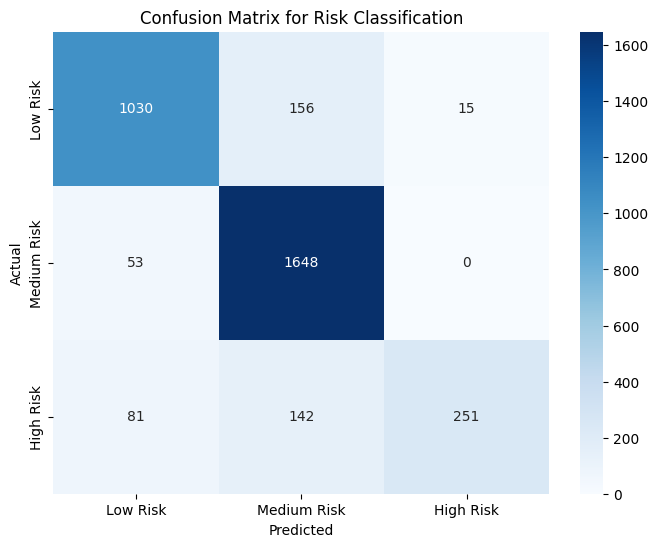

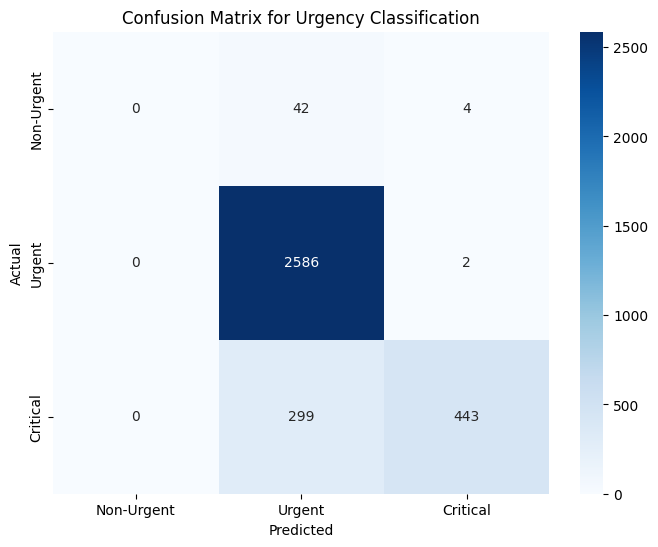

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion matrix for Risk classification
conf_matrix_risk = confusion_matrix(actual_risk, predicted_risk)

# Confusion matrix for Urgency classification
conf_matrix_urgency = confusion_matrix(actual_urgency, predicted_urgency)

# Plot confusion matrix for Risk classification
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_risk, annot=True, fmt="d", cmap="Blues", xticklabels=["Low Risk", "Medium Risk", "High Risk"], yticklabels=["Low Risk", "Medium Risk", "High Risk"])
plt.title("Confusion Matrix for Risk Classification")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Plot confusion matrix for Urgency classification
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_urgency, annot=True, fmt="d", cmap="Blues", xticklabels=["Non-Urgent", "Urgent", "Critical"], yticklabels=["Non-Urgent", "Urgent", "Critical"])
plt.title("Confusion Matrix for Urgency Classification")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [ ]:
from sklearn.metrics import classification_report

# Classification report for Risk classification
print("Classification Report for Risk Classification:")
print(classification_report(actual_risk, predicted_risk))

# Classification report for Urgency classification
print("Classification Report for Urgency Classification:")
print(classification_report(actual_urgency, predicted_urgency))


Classification Report for Risk Classification:
              precision    recall  f1-score   support

   High Risk       0.88      0.86      0.87      1201
    Low Risk       0.85      0.97      0.90      1701
 Medium Risk       0.94      0.53      0.68       474

    accuracy                           0.87      3376
   macro avg       0.89      0.79      0.82      3376
weighted avg       0.87      0.87      0.86      3376

Classification Report for Urgency Classification:
              precision    recall  f1-score   support

    Critical       0.00      0.00      0.00        46
  Non-Urgent       0.88      1.00      0.94      2588
      Urgent       0.99      0.60      0.74       742

    accuracy                           0.90      3376
   macro avg       0.62      0.53      0.56      3376
weighted avg       0.89      0.90      0.88      3376



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


**Improved method**

In [ ]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from transformers import pipeline, DistilBertTokenizer, DistilBertForSequenceClassification

# Ensure necessary NLTK resources are downloaded
nltk.download('punkt')
nltk.download('punkt_tab')

# Load the dataset (replace 'gpt-4.csv' with your actual file name)
df = pd.read_csv("gpt-4.csv", engine='python', on_bad_lines='skip')
data = pd.DataFrame(df)

# Define more comprehensive keywords for risk and urgency levels
low_risk_keywords = ["mild", "better", "normal", "routine", "no symptoms"]
medium_risk_keywords = ["fever", "cough", "body aches", "headache", "fatigue", "chills"]
high_risk_keywords = ["difficulty breathing", "chest pain", "emergency", "severe", "critical", "intense", "unconscious", "high fever"]

non_urgent_keywords = ["check-up", "follow-up", "routine", "monitor"]
urgent_keywords = ["severe", "noticeable symptoms", "trouble breathing", "headache worsening", "nausea", "dizziness"]
critical_keywords = ["life-threatening", "ICU", "critical", "can't move", "unresponsive", "hospitalization"]

# Load the tokenizer for the DistilBERT model
tokenizer = DistilBertTokenizer.from_pretrained("distilbert-base-uncased")
sentiment_model = pipeline("sentiment-analysis", model="distilbert-base-uncased-finetuned-sst-2-english", tokenizer=tokenizer)

# Helper function to truncate long texts using the tokenizer
def truncate_text(text, max_length=512):
    inputs = tokenizer(text, truncation=True, padding=True, max_length=max_length, return_tensors="pt")
    return tokenizer.decode(inputs["input_ids"][0], skip_special_tokens=True)

# Function to classify risk, urgency, and sentiment (added more detailed classifications)
def classify_risk_urgency(conversation):
    # Handle empty or missing conversations
    if pd.isna(conversation) or conversation.strip() == "":
        return "Unknown", "Unknown", "Neutral"

    # Truncate the conversation to avoid token length issues
    conversation = truncate_text(conversation, max_length=512)

    # Classify risk level based on keyword frequency and intensity
    risk_score = 0
    if any(word in conversation.lower() for word in high_risk_keywords):
        risk_score += 3  # Higher score for critical keywords
    if any(word in conversation.lower() for word in medium_risk_keywords):
        risk_score += 2
    if any(word in conversation.lower() for word in low_risk_keywords):
        risk_score += 1

    if risk_score >= 5:
        risk = "High Risk"
    elif risk_score == 3 or risk_score == 4:
        risk = "Medium Risk"
    else:
        risk = "Low Risk"

    # Classify urgency level based on keyword matching
    urgency_score = 0
    if any(word in conversation.lower() for word in critical_keywords):
        urgency_score += 3
    if any(word in conversation.lower() for word in urgent_keywords):
        urgency_score += 2
    if any(word in conversation.lower() for word in non_urgent_keywords):
        urgency_score += 1

    if urgency_score >= 5:
        urgency = "Critical"
    elif urgency_score == 3 or urgency_score == 4:
        urgency = "Urgent"
    else:
        urgency = "Non-Urgent"

    # Perform sentiment analysis to aid with urgency classification
    sentiment_result = sentiment_model(conversation)
    sentiment = sentiment_result[0]['label'] if sentiment_result else "Neutral"

    return risk, urgency, sentiment

# Apply the classification function to the dataset
data[["Risk", "Urgency", "Sentiment"]] = data["conversation"].apply(
    lambda x: pd.Series(classify_risk_urgency(x))
)

# Save the labeled dataset to a new CSV file
data.to_csv("labeled_dataset_with_sentiment.csv", index=False)

# Display the labeled dataset
print(data.head())


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Device set to use cpu


                                                data  \
0  This 60-year-old male was hospitalized due to ...   
1  A 39-year-old man was hospitalized due to an i...   
2  One week after a positive COVID-19 result this...   
3  This 69-year-old male was admitted to the ICU ...   
4  This 57-year-old male was admitted to the ICU ...   

                                        conversation       Risk     Urgency  \
0  Doctor: Good morning, how are you feeling toda...  High Risk  Non-Urgent   
1  Doctor: Hello, how are you feeling today?\nPat...  High Risk  Non-Urgent   
2  Doctor: Hello, how are you feeling today?\nPat...   Low Risk      Urgent   
3  Doctor: Hello, how are you feeling today?\nPat...  High Risk    Critical   
4  Doctor: Good morning, how are you feeling toda...   Low Risk      Urgent   

  Sentiment  
0  POSITIVE  
1  POSITIVE  
2  POSITIVE  
3  NEGATIVE  
4  NEGATIVE  


**rule based chatbot**

In [ ]:
# Updated urgency rules with more comprehensive keywords
rules = {
    "risk": {
        "High Risk": ["hospitalized", "ICU", "severe", "critical"],
        "Medium Risk": ["fever", "cough", "mild symptoms", "headache"],
        "Low Risk": ["normal", "better", "routine"]
    },
    "urgency": {
        "Critical": [
            "life-threatening", "unresponsive", "ICU", "heart attack",
            "severe chest pain", "difficulty breathing", "emergency"
        ],
        "Urgent": [
            "trouble breathing", "high fever", "worsening symptoms",
            "acute pain", "serious condition"
        ],
        "Non-Urgent": [
            "routine", "check-up", "mild symptoms", "monitor"
        ]
    },
    "sentiment": {
        "Positive": ["feeling better", "improved", "stable"],
        "Negative": ["worse", "critical", "severe"]
    }
}


In [ ]:
# Function to classify user input
def classify_query(user_input):
    risk = "Unknown"
    urgency = "Unknown"
    sentiment = "Neutral"

    # Check risk level
    for level, keywords in rules["risk"].items():
        if any(re.search(rf"\b{keyword}\b", user_input.lower()) for keyword in keywords):
            risk = level
            break

    # Check urgency level
    for level, keywords in rules["urgency"].items():
        if any(re.search(rf"\b{keyword}\b", user_input.lower()) for keyword in keywords):
            urgency = level
            break

    # Check sentiment
    for level, keywords in rules["sentiment"].items():
        if any(re.search(rf"\b{keyword}\b", user_input.lower()) for keyword in keywords):
            sentiment = level
            break

    return risk, urgency, sentiment

# Function to generate a response
def generate_response(risk, urgency, sentiment):
    response = "Based on your query:\n"
    response += f"- Risk Level: {risk}\n"
    response += f"- Urgency Level: {urgency}\n"
    response += f"- Sentiment: {sentiment}\n"

    # Add a recommendation based on risk and urgency
    if risk == "High Risk" or urgency == "Critical":
        response += "\n Advice: Please seek immediate medical attention!"
    elif urgency == "Urgent":
        response += "\n Advice: Schedule a doctor's appointment soon."
    else:
        response += "\n Advice: Continue monitoring and maintain routine check-ups."

    return response


In [ ]:
import re
# Chatbot loop
def chatbot():
    print("Welcome to the Rule-Based Healthcare Chatbot!")
    print("You can ask me questions about your health condition.")
    print("Type 'exit' to end the conversation.")

    while True:
        # Get user input
        user_input = input("\nYou: ")
        if user_input.lower() == "exit":
            print("Chatbot: Thank you for using the healthcare chatbot. Stay safe!")
            break

        # Classify the input
        risk, urgency, sentiment = classify_query(user_input)

        # Generate a response
        response = generate_response(risk, urgency, sentiment)

        # Print the response
        print(f"\nChatbot: {response}")

# Run the chatbot
chatbot()


Welcome to the Rule-Based Healthcare Chatbot!
You can ask me questions about your health condition.
Type 'exit' to end the conversation.

You: the patient has a normal check-up, everything seems routine.

Chatbot: Based on your query:
- Risk Level: Low Risk
- Urgency Level: Non-Urgent
- Sentiment: Neutral

 Advice: Continue monitoring and maintain routine check-ups.

You: This patient is experiencing life-threatening symptoms, they can't move and are in a critical state.

Chatbot: Based on your query:
- Risk Level: High Risk
- Urgency Level: Critical
- Sentiment: Negative

 Advice: Please seek immediate medical attention!

You: exit
Chatbot: Thank you for using the healthcare chatbot. Stay safe!


Welcome to the Rule-Based Healthcare Chatbot!
You can ask me questions about your health condition.
Type 'exit' to end the conversation.

You: hi

Chatbot: Based on your query:
- **Risk Level**: Unknown
- **Urgency Level**: Unknown
- **Sentiment**: Neutral

 Advice: Continue monitoring and maintain routine check-ups.

You: The patient is complaining of severe chest pain and difficulty breathing.

Chatbot: Based on your query:
- **Risk Level**: High Risk
- **Urgency Level**: Critical
- **Sentiment**: Negative

 Advice: Please seek immediate medical attention!

You: This patient is experiencing life-threatening symptoms, they can't move and are in a critical state.

Chatbot: Based on your query:
- **Risk Level**: High Risk
- **Urgency Level**: Critical
- **Sentiment**: Negative

 Advice: Please seek immediate medical attention!

You: the patient has a normal check-up, everything seems routine.

Chatbot: Based on your query:
- **Risk Level**: Low Risk
- **Urgency Level**: Non-Urgent
- **Sentiment**: Neutral

 Advice: Continue monitoring and maintain routine check-ups.

You: exit
Chatbot: Thank you for using the healthcare chatbot. Stay safe!